# Don't be mean

> My true religion is kindness.
>
> – The 14th Dalai Lama

In this short notebook we will see how to the calculate the pixel wise mean over a collection of images. For this we implement a simple custom Keras Layer which combines each given number of images within the input batch by calculating the mean of the images. 

## Getting ready


In [43]:

import numpy as np
import tensorflow as tf

from matplotlib import pyplot as plt
from IPython import display

image_paths = []
image_paths.append('./images/lovecoffee.jpg')
image_paths.append('./images/lovekillscapitalism.jpg')
image_paths.append('./images/light_1.jpg')
image_paths.append('./images/light_2.jpg')

## Preprocessing the images

1. Loading the two image files into PIL format:  
https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/load_img

2. Converting the PIL image instancea to Numpy arrays:  
https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/img_to_array

In [44]:
image_np_arries = []

for image_path in image_paths:

    image_pil = tf.keras.preprocessing.image.load_img(image_path) #(1)
    image_np_array = tf.keras.preprocessing.image.img_to_array(image_pil) #(2)
    image_np_arries.append(image_np_array)

image_np_array_batch = np.array(image_np_arries)


## The input images

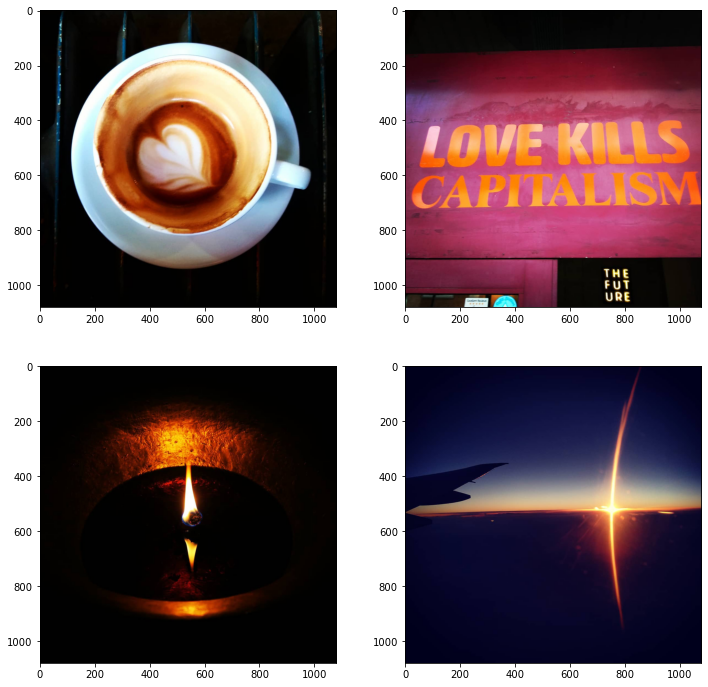

In [49]:
f, axarr = plt.subplots(2,2)

f.set_figheight(12)
f.set_figwidth(12)

for idx, image_np_array in enumerate(image_np_array_batch):
    row = idx % 2
    col = idx // 2
    axarr[col,row].imshow(image_np_array/255.)     

plt.show()

## Calculating the mean images

As we believe in the good of human kind we assume for the sake of simplicity that the length of the input batch is a multiple of the given *images_per_mean* parameter. 


In [46]:
class ImagesMean(tf.keras.layers.Layer):
    def __init__(self,images_per_mean):
        super(ImagesMean, self).__init__()
        self.images_per_mean = images_per_mean

    def call(self,input):
        
        x = tf.reshape(input,[-1,self.images_per_mean,input.shape[1],input.shape[2],input.shape[3]])
        return tf.math.reduce_mean(x,axis = 1)

images_mean_layer = ImagesMean(2)
image_mean_batch = images_mean_layer(image_np_array_batch)


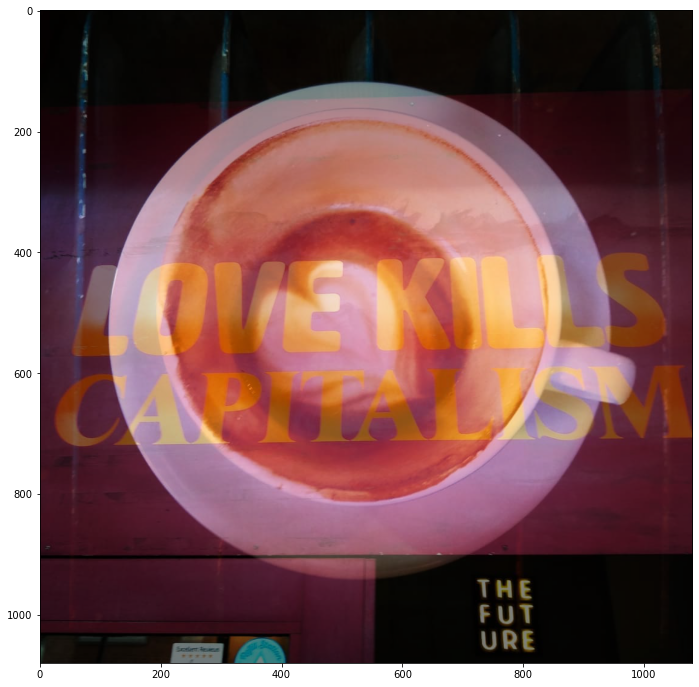

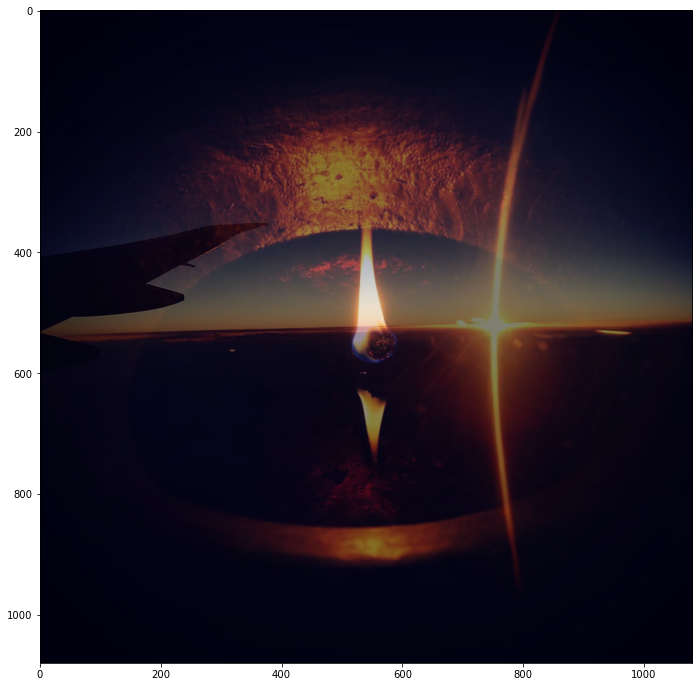

In [47]:


for image_np_array in image_mean_batch:
    
    plt.figure(figsize=(12,12))
    plt.imshow(image_np_array/255.0)

plt.show()
